In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the data into dataframe
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(url)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [3]:
y = df['Class'].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

### TASK  2
Standardize the data in X then reassign it to the variable X using the transform provided below.

In [4]:
#Dropping class column & creating x vairables
x = df.drop(['Class'], axis=1)
x.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [5]:
#Dropping Date, BoosterVersion, Outcome, LandingPad, Lattitude & Longitude columns
x = x.drop(['Date', 'BoosterVersion','Outcome', 'LandingPad','Longitude','Latitude'], axis=1)
x.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [6]:
# Using get dummies for one hot codiing
x = pd.get_dummies(data=x, columns=['Orbit','LaunchSite','Serial'])
x.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Converting all features into float
x = x.astype(float)
x.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 75, dtype: object

In [8]:
#Standardize the data & bring it into one scale
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.87082869e+00, -8.35531692e-01, -1.93309133e+00,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01,  9.43398113e+00, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
        -1.05999788e-01, -1.50755672e-01, -1.50755672e-0

### TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)
x_train.shape

(72, 75)

In [59]:
x_test.shape

(18, 75)

### Task 4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [60]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs','liblinear']}

In [61]:
#Creating a basic regression object
lr = LogisticRegression()

In [62]:
#Creating GridSeach CV object for running mulitiple iterations to find the best value of C, penalty method & solver
lr_grid_model = GridSearchCV(lr, param_grid=parameters)

In [63]:
#Fit x & y values in the algorithme to find the best model
best_lr_model = lr_grid_model.fit(x_train,y_train)

/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", 

In [64]:
#check best parameters for best accuracy
best_lr_model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [65]:
#accuracy
best_lr_model.best_score_

0.8342857142857143

### TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:


In [66]:
import sklearn.metrics as metrics
yhat = best_lr_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, yhat)
accuracy

0.8333333333333334

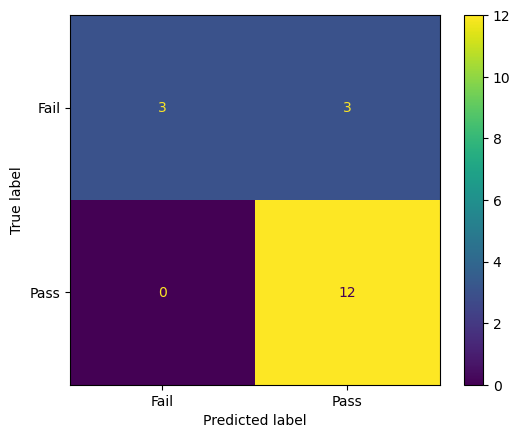

In [67]:
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, yhat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Fail','Pass'])
cm_display.plot()

In [68]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

1    12
0     6
Name: count, dtype: int64

### Task 6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [69]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [70]:
#Create SVM object
svm = SVC()

In [71]:
# GridsearchCV object
svm_grid_model = GridSearchCV(svm, param_grid=parameters)

In [72]:
best_model_svm = svm_grid_model.fit(x_train, y_train)
best_model_svm.best_params_

{'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [73]:
best_model_svm.best_score_

0.8342857142857143

In [74]:
yhat1 = best_model_svm.predict(x_test)
accuracy1 = metrics.accuracy_score(y_test, yhat1)
accuracy1

0.8333333333333334

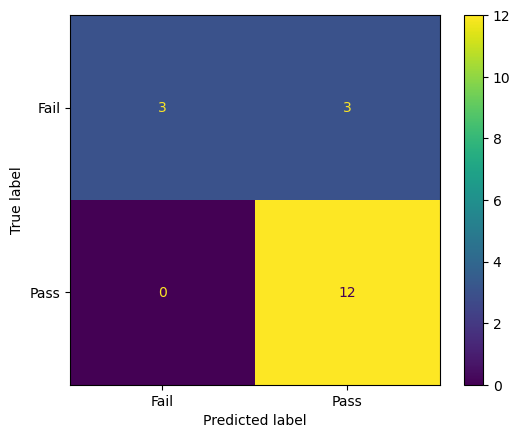

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, yhat1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Fail', 'Pass'])
cm_display.plot()

### Decision Tree

In [76]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [77]:
tree = DecisionTreeClassifier()

In [78]:
tree_grid_model = GridSearchCV(tree, param_grid=parameters)

In [79]:
best_model_tree = tree_grid_model.fit(x_train, y_train)

/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/akash/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home

In [87]:
yhat2 = best_model_tree.predict(x_test)
accuracy2 = metrics.accuracy_score(y_test, yhat2)
accuracy2

0.8888888888888888

### KNN

In [81]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [82]:
KNN = KNeighborsClassifier()

In [83]:
KNN_grid_model = GridSearchCV(KNN, param_grid=parameters)

In [84]:
best_model_KNN = KNN_grid_model.fit(x_train, y_train)

In [85]:
yhat3 = best_model_KNN.predict(x_test)
accuracy3= metrics.accuracy_score(y_test, yhat3)
accuracy3

0.8333333333333334

In [86]:
Accuracy_score = [accuracy, accuracy1, accuracy2, accuracy3]
Accuracy_score

[0.8333333333333334,
 0.8333333333333334,
 0.8888888888888888,
 0.8333333333333334]

### LR, SVM & KNN are the best model to use for prediction of successful landing of spacex.